# Initial notebook to highlight educational components

This notebook showcases the initial education features intended by the callysto fish-trap project.

It will use basic geometry to allow the user to build a traps. As the fish traps modeled are semi-circular traps found along beaches and rivers the user  will be able to specify:

* the radius of the trap
* the height of its walls

The slope of the beach, the tide levels, and the location of the trap on the beach are fixed parameters.

In [ ]:
%run -i ./scripts/scripts.py
import ipywidgets as widgets

In [ ]:
create_tide_plot()
tide_values = get_tide_values()
print("the plot has minimal value:", min(tide_values))
print("the plot has maximal value:", max(tide_values))

The tide values are based of measured readings from a the goverment for 1 week in May. They are measured hourly. To catch fish - the traps lowest point needs to be between the minimum and maximum values. The height of the fish trap is given by:

$$z = (b+h)  +m \cdot y$$

where $m$ is the slope of the beach with intercept $b$, and $h$ is the hight of the trap built. The $y$ values come from the user inputs for the radius:

$$y = r \cdot \sin(\theta) + \Delta$$
$$x = r \cdot \cos(\theta)$$
$$\theta \in (0, \pi)$$

The user contols $r$. $\Delta$ is how far down the beach the trap is fixed at 5m down the beach.


The trap can be "built" with user controlled inputs

In [ ]:
trap_points = get_perimeter(radius = 25, height = 2)

print("the highest point of the trap is:", max(trap_points[2]), "m")
print("the lowest point of the trap is:", min(trap_points[2]), "m")

## Below are examples of running the functions for the trap model

In [ ]:
radius = widgets.IntSlider(
    value=20,
    min=4,
    max=25,
    step=1,
    description='radius:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

height = widgets.FloatSlider(
    value=2,
    min=0.4,
    max=2,
    step=0.2,
    description='height:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

slope = widgets.FloatSlider(
    value=1.7,
    min=0.1,
    max=2,
    step=0.1,
    description='slope:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

constant_population= widgets.Checkbox(
    value=False,
    description='Keep population constant',
    disabled=False
)

In [ ]:
display(radius)
display(height)
display(slope)
display(constant_population)

In [ ]:
plot_trap(radius = radius.value, height = height.value, slope.value)

In [2]:
# This demonstrates how the model where harvesting is user selected is ran.
%run -i ./scripts/scripts.py
flag = False
results = []
selected_harvest = 0
while(not flag):
    results = run_trap_harvesting(prev_values = results, selected_harvest = selected_harvest)
    selected_harvest = math.floor(results[1][-1])
    flag = results[4]

In [ ]:
# Same as above but with user prompts that should be replaced by somthing user friendly 
# the same arguments such as slope and radius can be inputed here
%run -i ./scripts/scripts.py
flag = False
current_results = []
selected_harvest = 0
while(not flag):
    try:
        current_results = run_trap_harvesting(prev_values = current_results, selected_harvest = selected_harvest, constant_population = False)
    except ValueError:
            print("INPUT NOT ACCEPTED: enter a positive integer not greater than the number of the fish in the trap.")
    finally:
        print("there are ", math.floor(current_results[1][-1]), "fish in the trap.")
        print("how many fish would you like to harvest?")
        selected_harvest = input()
        flag = current_results[4]
    

there are  229 fish in the trap.
how many fish would you like to harvest?
343
enter a positive integer not greater than the number of the fish in the trap.
there are  229 fish in the trap.
how many fish would you like to harvest?


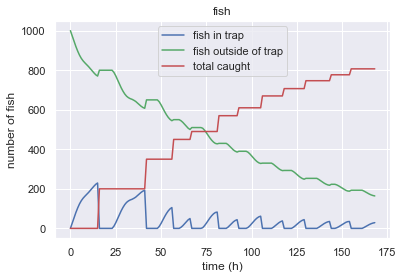

In [9]:
# these obtained values can be plotted with this command
plot_values(current_results)

## Future Work

* build nice visuals the progress as the user develops the model
* Make the model run step wise if harvesting is seleted. This will fix kernel busy bug if cell is re-ran
* hide code
* create button to reset to defaults
* create butto to run the model
* adapt the model such that there is a larger force acting on fish as they become densily populated in the trap

In [ ]:

run_trap

In [ ]:
#get the array showing the hourly tide
get_tide_values()